In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
data = pd.read_csv('/content/drive/MyDrive/Data science/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
print(data.info())
print(data['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [35]:
# Convert Attrition to binary (Yes=1, No=0)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Encode other categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [36]:
# Drop irrelevant columns like 'EmployeeNumber', 'Over18', 'StandardHours'
data = data.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)

# Split the data into features (X) and target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [38]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



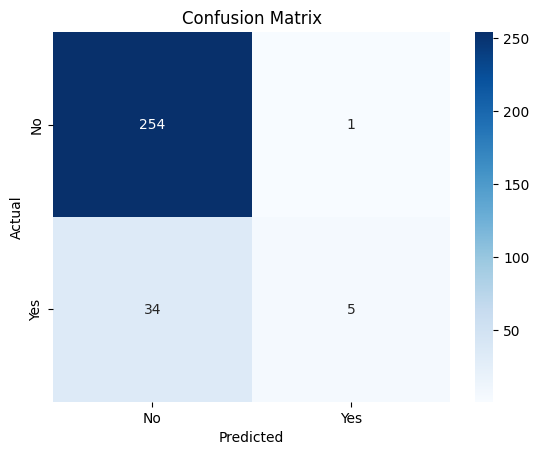

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



                     Feature  Importance
15             MonthlyIncome    0.078212
18                  OverTime    0.066669
0                        Age    0.061569
2                  DailyRate    0.054087
23         TotalWorkingYears    0.052491
16               MonthlyRate    0.048373
9                 HourlyRate    0.047369
4           DistanceFromHome    0.045999
26            YearsAtCompany    0.041347
17        NumCompaniesWorked    0.037951
19         PercentSalaryHike    0.034452
12                   JobRole    0.031392
29      YearsWithCurrManager    0.030781
14             MaritalStatus    0.029537
22          StockOptionLevel    0.029338
27        YearsInCurrentRole    0.029010
28   YearsSinceLastPromotion    0.027738
13           JobSatisfaction    0.027425
7    EnvironmentSatisfaction    0.026162
11                  JobLevel    0.025210
24     TrainingTimesLastYear    0.024952
6             EducationField    0.023471
10            JobInvolvement    0.023458
21  Relationship

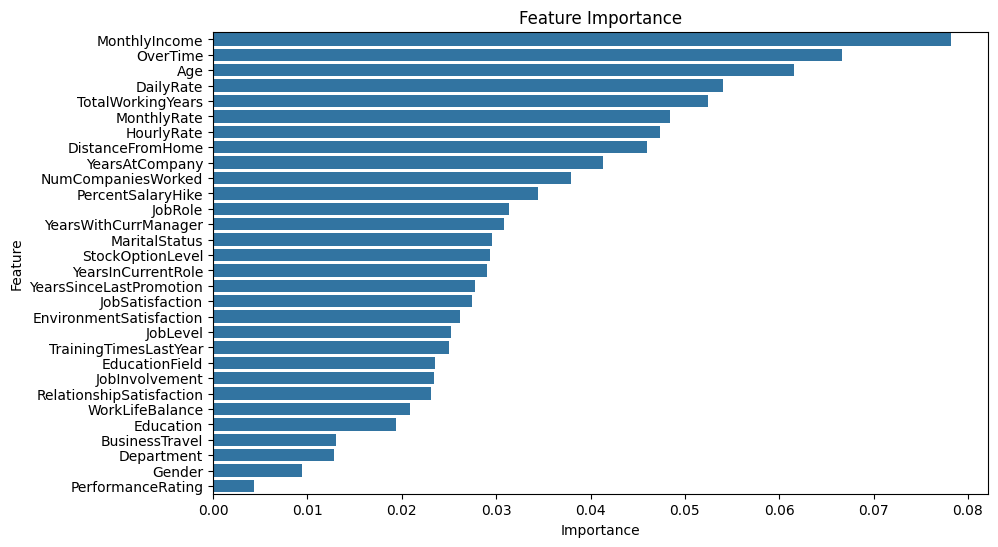

In [42]:
#Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()



In [43]:
#Predict employees likely to leave
X_test['Predicted_Attrition_Probability'] = y_pred_proba
high_risk_employees = X_test[X_test['Predicted_Attrition_Probability'] > 0.5]
print("High Risk Employees:\n", high_risk_employees)

High Risk Employees:
            Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1222 -1.415181        0.590048  -1.394460   -2.389147          1.580370   
494  -0.320163        0.590048  -1.483707    1.401512          0.593216   
363  -0.429664        0.590048  -1.121758    1.401512         -0.517332   
892  -1.962690       -2.416437  -0.739977   -0.493817          0.099639   
777  -1.743687        0.590048   1.317678   -0.493817          0.099639   
422  -1.962690        0.590048  -0.777163   -2.389147         -0.887515   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
1222  -1.868426       -1.688776                 1.169781  0.816497   
494    0.085049        2.068035                 0.254625 -1.224745   
363    0.085049       -0.186052                 1.169781 -1.224745   
892    0.085049        0.565311                -1.575686 -1.224745   
777    0.085049       -0.937414                 0.254625 -1.224745   
422   -0.891688        2.068035 